<a href="https://colab.research.google.com/github/there-exist/thereexist_/blob/master/2019_11_29_Green's_function_without_matrix_(3)_final%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import library

import numpy as np
import matplotlib.pyplot as plt
import mpmath as mp
from sympy import *
from sympy.abc import t, T, a, u

init_printing()
mp.dps = 12; mp.pretty = True

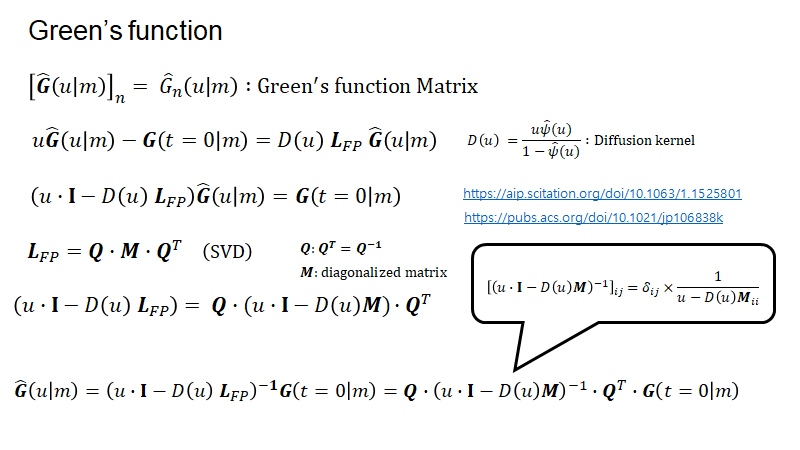

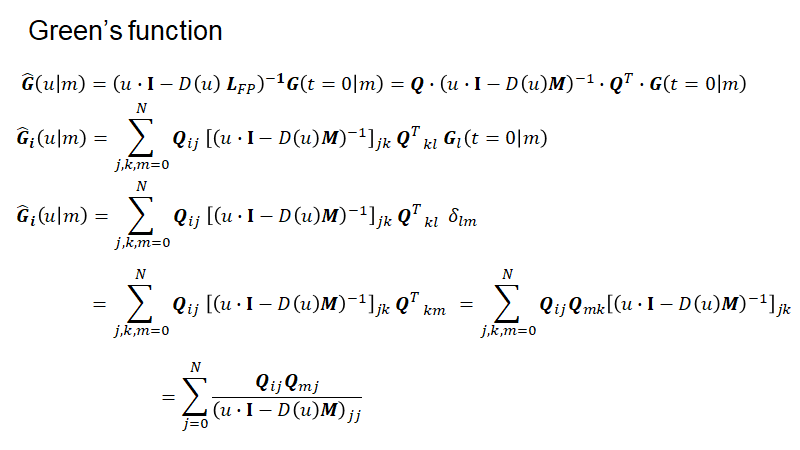

In [0]:
def Qu(N):
    i = np.array([np.linspace(0,N,N+1)])
    k = i.T
    
    Qu = np.sqrt(2/(N+1))*np.cos(k*(i+0.5)*np.pi / (N+1))
    
    Qu = Qu.T
    
    Qu[:,0] = np.sqrt(1/(N+1))
    
    return Qu

In [8]:
print(Qu(3))

[[ 0.5         0.65328148  0.5         0.27059805]
 [ 0.5         0.27059805 -0.5        -0.65328148]
 [ 0.5        -0.27059805 -0.5         0.65328148]
 [ 0.5        -0.65328148  0.5        -0.27059805]]


$\hat\psi(u)$ 의 형태는 여기에서 바꾸면 된다. 

$\psi(t) = 1 / (1+t/t_d)^{1+\alpha}$

$\hat\psi(u) = {(u t_d)}^{\alpha} a e^{t_d u} \Gamma\left(-\alpha, T u\right)$

In [0]:
def hat_psi(td, a, u):  
    
    result = a*mp.exp(td*u)*(td*u)**a* mp.gammainc(-a,td*u,mp.inf)
    
    return result


In [0]:
def D(td, a, u):  
  psi = hat_psi(td, a, u)
  return u*psi / (1-psi)

In [0]:
def G(n,m,N,u,td,a):
    
    Qua = Qu(N)

    i = np.linspace(0,N,N+1)
    M = -4 * np.sin(i*np.pi / (2 * (N+1)))**2
    
        
    Da = D(td,a,u)
    

    q1 = Qua[n,:]
    q2 = Qua[m,:]
    denominator = u - M*Da
       
    result = np.sum(np.multiply(np.multiply(q1,q2),denominator**-1))
    '''
    이 부분의 계산에서 np.multiply라는 함수를 새롭게 알게 되었다. 각각의 element끼리 곱해서 새로운 matrix를 만드는 함수이다.
    np.multiply([1,2,3],[1,2,3]) = [1,4,9] 
    '''
    return result

In [12]:
G(n = 1,m = 3,N = 3,u = 1,td = 1,a = 0.5)

mpf('0.033106739291699896')

Diagonalized matrix -> checked
Q matrix -> use same one
u -> same
M matrix -> checked

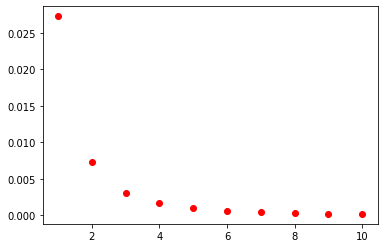

In [13]:
U = mp.linspace(1,10,10)
for i in U:
    plt.plot(i,G(3,5,10,i,1,0.5),'ro')

plt.show()

In [0]:
def G_graph(u_initial, u_final, slicing_number, n, m, N, td, a):
  
  U = mp.linspace(u_initial,u_final,slicing_number)

  Ga = []

  for i in U:

    result = G(n,m,N,i,td,a)
    Ga.append(result)


  return U, Ga

n = 5


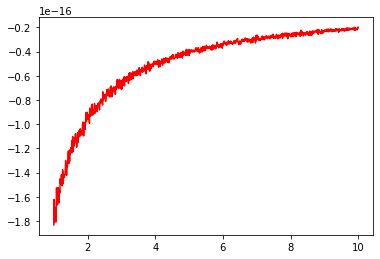

n = 10


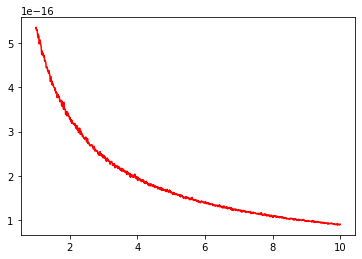

n = 15


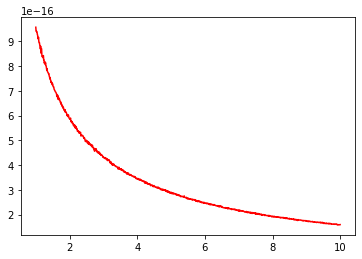

n = 20


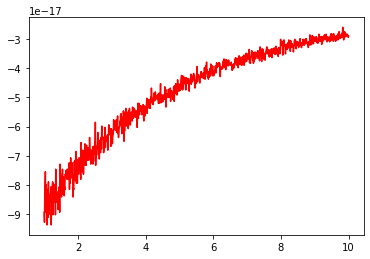

n = 25


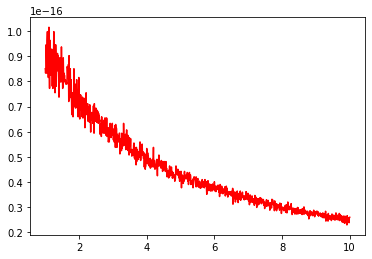

n = 30


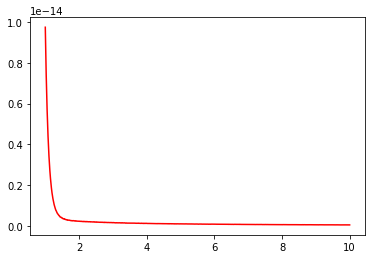

n = 35


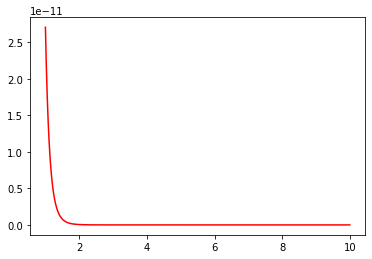

n = 40


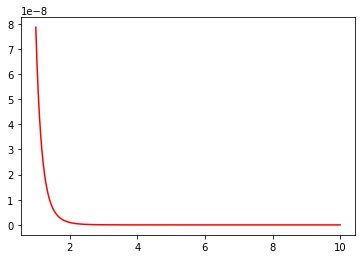

n = 45


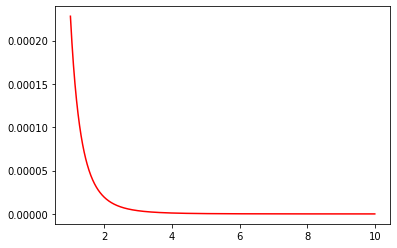

n = 50


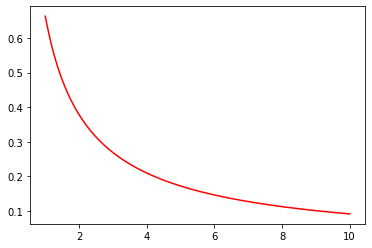

CPU times: user 38.6 s, sys: 35.8 ms, total: 38.6 s
Wall time: 38.6 s


In [15]:
%%time
for i in range(1,11):
  U, Ga = G_graph(u_initial = 1, u_final = 10, slicing_number = 1000, n = 5*i, m = 50, N = 100, td = 1, a = 0.5)

  plt.plot(U, Ga, 'r')
  
  print('n =', 5*i)
  plt.show()

이전의 결과와 비교시, 답도 정확하게 나오는 것을 확인했을 뿐 아니라, 그 속도가 크게 향상되었음을 확인했다. (2019.11.29)

In [16]:
print(G(n = 1,m = 1,N = 3,u = 1,td = 1,a = 0.5))

0.668337635359628


CPU times: user 3min 2s, sys: 35.7 ms, total: 3min 2s
Wall time: 3min 2s


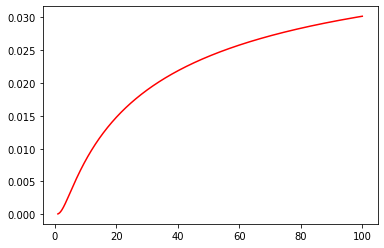

In [17]:
%%time

g = lambda u: G(45, 50, 100, u, 1, 0.5)


## G = Green_function(n, m, N, u, td, a)

Time = mp.linspace(1,100,1000)

time_domain_G = []

for i in Time:
    result = mp.invertlaplace(g,i, method= 'stehfest')
    
    time_domain_G.append(result)
    
plt.plot(Time,time_domain_G,'r-')

CPU times: user 3min 7s, sys: 37 ms, total: 3min 7s
Wall time: 3min 7s


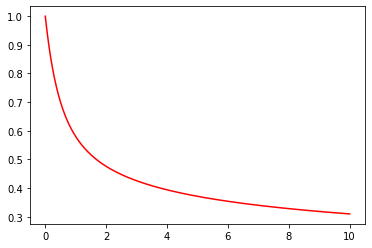

In [18]:
%%time

g = lambda u: G(50, 50, 100, u, 1, 0.5)


## G = Green_function(n, m, N, u, td, a)

Time = mp.linspace(1E-4,10,1000)

time_domain_G = []

for i in Time:
    result = mp.invertlaplace(g,i, method= 'stehfest')
    
    time_domain_G.append(result)
    
plt.plot(Time,time_domain_G,'r-')

CPU times: user 3min 19s, sys: 82.9 ms, total: 3min 19s
Wall time: 3min 19s


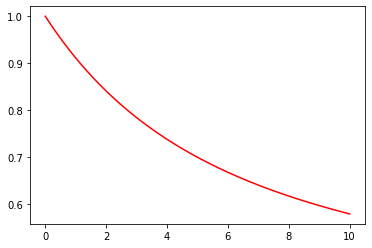

In [19]:
%%time

g = lambda u: G(50, 50, 100, u, 10, 0.5)


## G = Green_function(n, m, N, u, td, a)

Time = mp.linspace(1E-4,10,1000)

time_domain_G = []

for i in Time:
    result = mp.invertlaplace(g,i, method= 'stehfest')
    
    time_domain_G.append(result)
    
plt.plot(Time,time_domain_G,'r-')

In [0]:
g = lambda u: G(5, 5, 10, u, 0.1, 0.1)

mp.invertlaplace(g,1E-10, method= 'stehfest')

CPU times: user 18.4 s, sys: 5.99 ms, total: 18.4 s
Wall time: 18.4 s


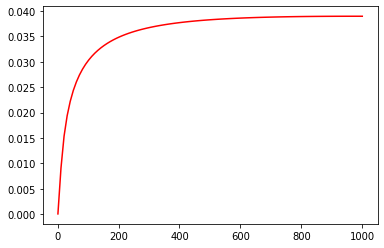

In [20]:
%%time

g = lambda u: G(45, 50, 100, u, 1, 0.5)


## G = Green_function(n, m, N, u, td, a)

Time = mp.linspace(1,1000,100)

time_domain_G = []

for i in Time:
    result = mp.invertlaplace(g,i, method= 'stehfest')
    
    time_domain_G.append(result)
    
plt.plot(Time,time_domain_G,'r-')

CPU times: user 18.7 s, sys: 998 µs, total: 18.7 s
Wall time: 18.7 s


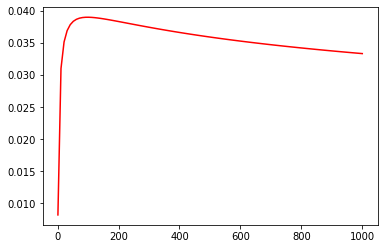

In [21]:
%%time

g = lambda u: G(45, 50, 100, u, 0.1, 0.5)


## G = Green_function(n, m, N, u, td, a)

Time = mp.linspace(1,1000,100)

time_domain_G = []

for i in Time:
    result = mp.invertlaplace(g,i, method= 'stehfest')
    
    time_domain_G.append(result)
    
plt.plot(Time,time_domain_G,'r-')

CPU times: user 18.7 s, sys: 6 ms, total: 18.7 s
Wall time: 18.7 s


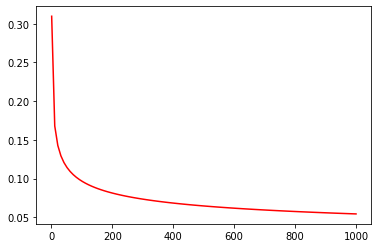

In [22]:
%%time

g = lambda u: G(50, 50, 100, u, 0.1, 0.5)


## G = Green_function(n, m, N, u, td, a)

Time = mp.linspace(1,1000,100)

time_domain_G = []

for i in Time:
    result = mp.invertlaplace(g,i, method= 'stehfest')
    
    time_domain_G.append(result)
    
plt.plot(Time,time_domain_G,'r-')

CPU times: user 18.3 s, sys: 3 ms, total: 18.3 s
Wall time: 18.3 s


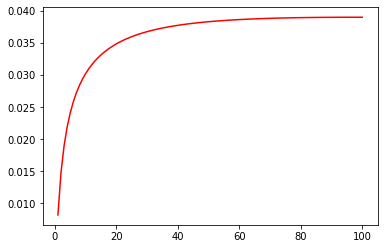

In [24]:
%%time

g = lambda u: G(45, 50, 100, u, 0.1, 0.5)


## G = Green_function(n, m, N, u, td, a)

Time = mp.linspace(1,100,100)

time_domain_G = []

for i in Time:
    result = mp.invertlaplace(g,i, method= 'stehfest')
    
    time_domain_G.append(result)
    
plt.plot(Time,time_domain_G,'r-')

CPU times: user 18.4 s, sys: 6 ms, total: 18.5 s
Wall time: 18.5 s


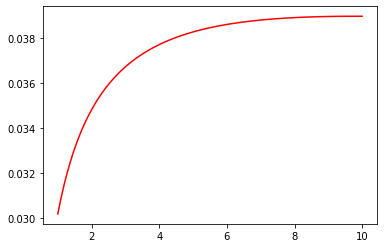

In [25]:
%%time

g = lambda u: G(45, 50, 100, u, 0.01, 0.5)


## G = Green_function(n, m, N, u, td, a)

Time = mp.linspace(1,10,100)

time_domain_G = []

for i in Time:
    result = mp.invertlaplace(g,i, method= 'stehfest')
    
    time_domain_G.append(result)
    
plt.plot(Time,time_domain_G,'r-')

CPU times: user 18.6 s, sys: 7.99 ms, total: 18.6 s
Wall time: 18.6 s


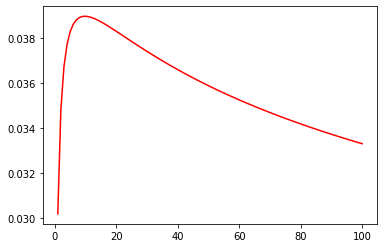

In [26]:
%%time

g = lambda u: G(45, 50, 100, u, 0.01, 0.5)


## G = Green_function(n, m, N, u, td, a)

Time = mp.linspace(1,100,100)

time_domain_G = []

for i in Time:
    result = mp.invertlaplace(g,i, method= 'stehfest')
    
    time_domain_G.append(result)
    
plt.plot(Time,time_domain_G,'r-')